<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [2]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn

We will import the following libraries for the lab


In [4]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [6]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [50]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [52]:
file_path = r"C:\Users\Raegan\Downloads\AppliedDataScinece_PedictiveAnalysis_part2.csv"  #remname file
try:
    data.to_csv(file_path, index=False)
    print(f'DataFrame saved to {file_path}')
except Exception as e:
    print(f'An error occurred: {e}')

DataFrame saved to C:\Users\Raegan\Downloads\AppliedDataScinece_PedictiveAnalysis_part2.csv


In [10]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [56]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [58]:
file_path = r"C:\Users\Raegan\Downloads\AppliedDataScinece_PedictiveAnalysis_part3.csv"  #remname file
try:
    X.to_csv(file_path, index=False)
    print(f'DataFrame saved to {file_path}')
except Exception as e:
    print(f'An error occurred: {e}')

DataFrame saved to C:\Users\Raegan\Downloads\AppliedDataScinece_PedictiveAnalysis_part3.csv


In [14]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [16]:
# Create a NumPy array from the 'Class' column # can be a multidimentional array for computation
Y = data['Class'].to_numpy()

# If you want Y to be a Pandas Series, you can do:
# Y_series = data['Class']  # This keeps it as a Pandas Series one-dimensional

In [196]:
print(Y)

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [26]:
print(Y_series)

0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Name: Class, Length: 90, dtype: int64


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [18]:
transform = preprocessing.StandardScaler()

# Standardize the data and reassign it to X
X = transform.fit_transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [82]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [25]:
Y_test.shape

(18,)

## TASK  4 Logistic Regression


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [27]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
#C controls the trade-off between fitting anthe training data and keeping the model simple (avoids overfitting) parameters being tested to see how they effect models performanc
#penalty - ridge regressiong- L2- hleps prevent overfitting by discouraging large weights
#algorithm used to optimise logistic regression "lbfgs" particulariily suitable for small data sets



In [29]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


In [40]:
#Create a GridSearchCV object with cv=10
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)
logreg_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

# Fit the GridSearchCV object to find the best parameters
logreg_cv.fit(X_train, Y_train)

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [42]:
# Retrieve the best parameters found by GridSearchCV
best_params = logreg_cv.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [44]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [60]:
# Calculate accuracy on the test data using the score method
accuracy = logreg_cv.score(X_test, Y_test)

print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.8333333333333334


Lets look at the confusion matrix:


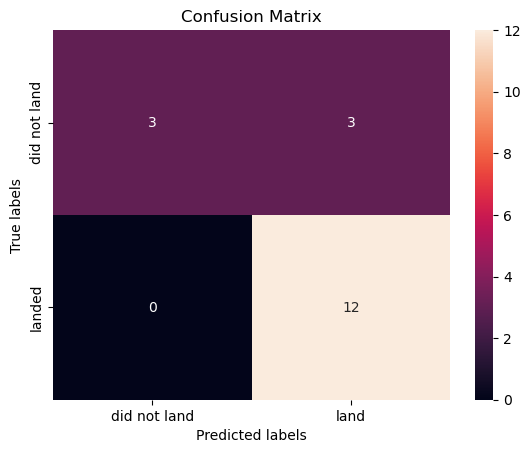

In [62]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6  SVM


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [64]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [66]:
# Create a GridSearchCV object with cv=10
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
svm_cv.fit(X_train, Y_train)

# Retrieve the best parameters found by GridSearchCV
best_params = svm_cv.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}


In [68]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [72]:
# Calculate accuracy on the test data using the score method
accuracy = svm_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.8333333333333334


We can plot the confusion matrix


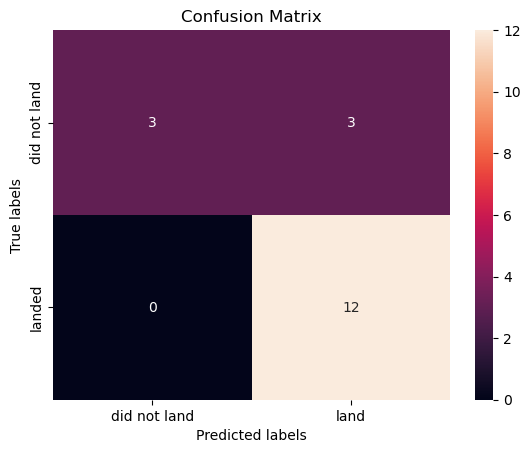

In [74]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8 Tree


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
# If X_train is a numpy array, convert it to a DataFrame for checking NaNs - tested
# if isinstance(X_train, np.ndarray):
#     X_train = pd.DataFrame(X_train)
    
# if isinstance(Y_train, np.ndarray):
#     Y_train = pd.DataFrame(X_train)    

# # Check for NaN values
# print("NaN values in features:\n", X_train.isnull().sum())
# print("NaN values in target:\n", Y_train.isnull().sum())

# # Check for infinite values
# print("Infinite values in features:\n", np.isinf(X_train).sum())
# print("Infinite values in target:\n", np.isinf(Y_train).sum())

In [84]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],  # Generates [2, 4, 6, ..., 18]
    'max_features': ['sqrt', 'log2', None],      # Valid options for max_features
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

tree = DecisionTreeClassifier()

In [86]:
# Create a GridSearchCV object with cv=10
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
try:
    tree_cv.fit(X_train, Y_train)
except Exception as e:
    print(f"Error during fitting: {e}")


# Retrieve the best parameters found by GridSearchCV
best_params = tree_cv.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}


In [88]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8892857142857145


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [90]:
# Calculate accuracy on the test data using the score method
accuracy = tree_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.7777777777777778


We can plot the confusion matrix


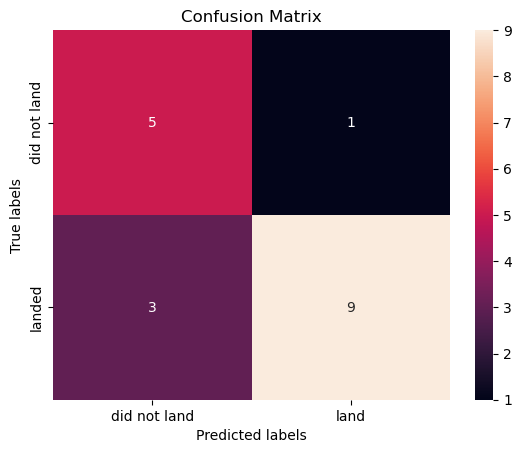

In [92]:
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_tree)

## TASK  10 KNN


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [130]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [132]:
# Create a GridSearchCV object with cv=10
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
knn_cv.fit(X_train, Y_train)

# Retrieve the best parameters found by GridSearchCV
best_params = knn_cv.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}


In [150]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
accuracy_knn_train = knn_cv.best_score_
print("accuracy knn train :",accuracy_knn_train)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy knn train : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [146]:
# Calculate accuracy on the test data using the score method
accuracy_knn_test = knn_cv.score(X_test, Y_test)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.8333333333333334


We can plot the confusion matrix


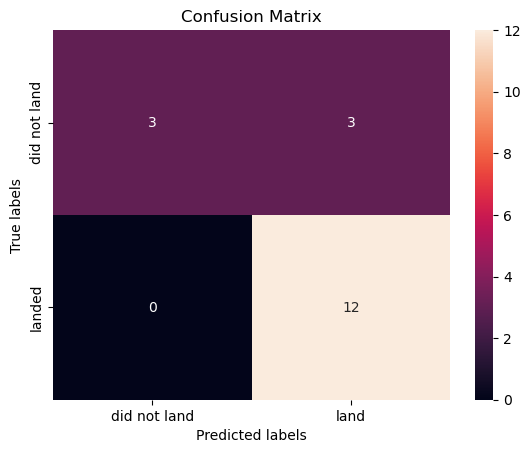

In [138]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


## Authors


C:\Users\Raegan\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


                    Model  Accuracy Train  Accuracy Test
0     Logistic Regression        0.875000       0.833333
1  Support Vector Machine        0.875000       0.833333
2           Decision Tree        0.847222       0.833333
3     K-Nearest Neighbors        0.847222       0.833333


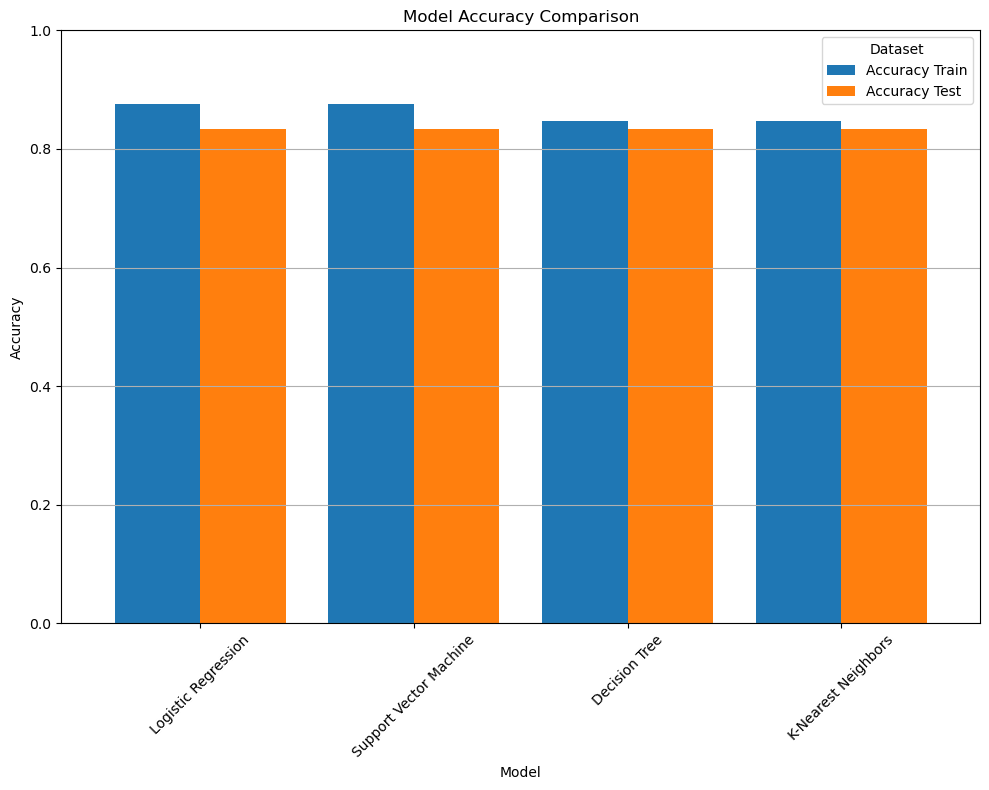


Model: Logistic Regression
Confusion Matrix:
[[ 3  3]
 [ 0 12]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


Model: Support Vector Machine
Confusion Matrix:
[[ 3  3]
 [ 0 12]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


Model: Decision Tree
Confusion Matrix:
[[ 3  3]
 [ 0 12]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00    

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
Y = data['Class'].to_numpy()

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models and their parameter grids
models_params = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=500),  # Increased max_iter to allow convergence
        'params': {
            'C': [0.01, 0.1, 1],  # Regularization strength
            'penalty': ['l2'],     # L2 penalty (ridge regression)
            'solver': ['lbfgs']    # Optimization algorithm suitable for small datasets
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'params': {
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
            'C': np.logspace(-3, 3, 5),                       # Regularization parameter
            'gamma': np.logspace(-3, 3, 5)                    # Kernel coefficient
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],                 # Measure of impurity
            'splitter': ['best', 'random'],                   # Strategy for splitting nodes
            'max_depth': [2 * n for n in range(1, 10)],      # Maximum depth of the tree
            'max_features': ['sqrt', 'log2', None],          # Number of features to consider for the best split
            'min_samples_leaf': [1, 2, 4],                    # Minimum samples required to be at a leaf node
            'min_samples_split': [2, 5, 10]                    # Minimum samples required to split an internal node
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],   # Number of neighbors to use
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
            'p': [1, 2]                                       # Power parameter for the Minkowski distance (1 for Manhattan, 2 for Euclidean)
        }
    }
}

# Create a list to hold evaluation results
evaluation_results = []

# Train each model using GridSearchCV and evaluate accuracy
for model_name, model_info in models_params.items():
    model = model_info['model']
    param_grid = model_info['params']
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
    grid_search.fit(X_train, Y_train)
    
    train_accuracy = grid_search.score(X_train, Y_train)
    test_accuracy = grid_search.score(X_test, Y_test)
    
    predictions = grid_search.predict(X_test)
    
    conf_matrix = confusion_matrix(Y_test, predictions)
    class_report = classification_report(Y_test, predictions)

    evaluation_results.append({
        'Model': model_name,
        'Accuracy Train': train_accuracy,
        'Accuracy Test': test_accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report,
    })

# Create a DataFrame from the results (excluding confusion matrices for clarity)
evaluation_df = pd.DataFrame(evaluation_results)

# Display the evaluation DataFrame without confusion matrix for better readability in tabular format.
print(evaluation_df[['Model', 'Accuracy Train', 'Accuracy Test']])

# Plotting accuracy comparison bar chart
evaluation_df.set_index('Model', inplace=True)  # Set the index to the model names for better plotting

ax = evaluation_df[['Accuracy Train', 'Accuracy Test']].plot(kind='bar', figsize=(10, 8), width=0.8)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.grid(axis='y')

# Show the plot
plt.legend(title='Dataset')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

# Optionally display confusion matrices and classification reports separately.
for result in evaluation_results:
    print(f"\nModel: {result['Model']}")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("\nClassification Report:")
    print(result['Classification Report'])

In [6]:
print(evaluation_df)

                    Model  Accuracy Train  Accuracy Test   Confusion Matrix  \
0     Logistic Regression        0.875000       0.833333  [[3, 3], [0, 12]]   
1  Support Vector Machine        0.875000       0.833333  [[3, 3], [0, 12]]   
2           Decision Tree        0.847222       0.833333  [[3, 3], [0, 12]]   
3     K-Nearest Neighbors        0.847222       0.833333  [[3, 3], [0, 12]]   

                               Classification Report  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  
2                precision    recall  f1-score   ...  
3                precision    recall  f1-score   ...  


NameError: name 'plt' is not defined

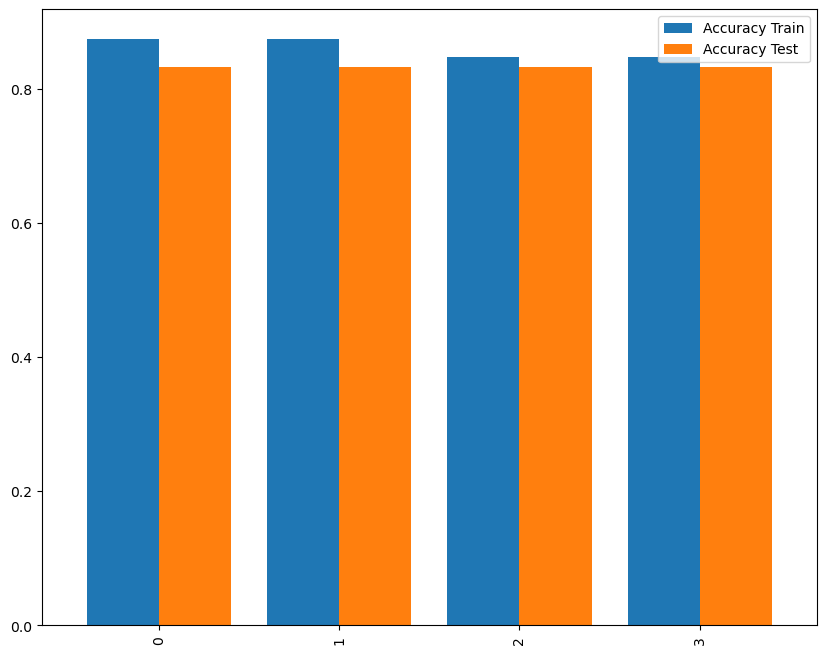

In [10]:
# Set the index to the model names for better plotting
# evaluation_df.set_index('Model', inplace=True)

# Plotting
ax = evaluation_df.plot(kind='bar', figsize=(10, 8), width=0.8)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.grid(axis='y')

# Show the plot
plt.legend(title='Dataset', labels=['Training Accuracy', 'Testing Accuracy'])
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

In [ ]:
## Best model is decison tree  with the best test and train accuracy - if you change the seed the values change dramatically try 42 (needs further investigation)

[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
